<a href="https://colab.research.google.com/github/elrrascabuches/Talleres-IA-aplicada-Manuel-Alarcon/blob/main/Taller_Reg_Lineal_ALARCON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/LinaMariaCastro/curso-ia-para-economia/blob/main/clases/5_Aprendizaje_supervisado/1_Taller_Regresion_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Inteligencia Artificial con Aplicaciones en Economía I**

- 👩‍🏫 **Profesora:** [Lina María Castro](https://www.linkedin.com/in/lina-maria-castro)  
- 📧 **Email:** [lmcastroco@gmail.com](mailto:lmcastroco@gmail.com)  
- 🎓 **Universidad:** Universidad Externado de Colombia - Facultad de Economía

# **Taller: Regresión Lineal**

**IMPORTANTE**: Guarda una copia de este notebook en tu Google Drive o computador.

**Taller en parejas**

**Nombres estudiantes:**

-Manuel Alejandro Alarcón Morales


**Forma de entrega**

Jupyter Notebook publicado en su cuenta de Github con el nombre “Taller_Reg_Lineal_apellidos_estudiantes.ipynb”.

**Plazo de entrega**

29 de octubre, máximo a las 11:59 p.m., debes enviar link del notebook al correo lina.castro6@uexternado.edu.co, de lo contrario, no será tenido en cuenta.

**Instrucciones Generales**

Completa el código en las celdas marcadas con `### TU CÓDIGO AQUÍ ###`. Puedes añadir más celdas si lo requieres.

Contexto: Tu Primer Proyecto en AutoAnalitica 📈 🚗

¡Felicitaciones! Has sido contratado como Científico de Datos Junior en AutoAnalitica, una firma de consultoría líder que asesora a grandes concesionarios de autos usados en el país.

Tu primer proyecto es construir un prototipo de modelo de pricing inteligente. La gerencia de uno de nuestros clientes principales está preocupada porque sus agentes de ventas tasan los vehículos que reciben basándose únicamente en su intuición, lo que genera precios inconsistentes y pérdida de oportunidades.

El objetivo: Desarrollar un modelo de machine learning que pueda predecir el precio de venta justo de un automóvil basándose en sus características (antigüedad, kilómetros recorridos, tipo de combustible, etc.). Esta herramienta no busca reemplazar al vendedor, sino darle un precio base, basado en datos, para hacer ofertas más rápidas, justas y competitivas. Tu misión hoy es construir el primer modelo base y evaluar su precisión.

# 1. Importar librerías necesarias

In [31]:
# Librerías para manipulación y análisis de datos
import pandas as pd
import numpy as np

# Librerías para visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías para modelamiento
import statsmodels.api as sm  # Para el enfoque econométrico (inferencia)
from sklearn.datasets import fetch_california_housing # Dataset
from sklearn.model_selection import train_test_split # Para dividir los datos
from sklearn.linear_model import LinearRegression # Modelo de ML (predicción)
from sklearn.metrics import mean_squared_error, r2_score # Métricas de evaluación

# Pruebas de Supuestos
from statsmodels.stats.diagnostic import het_breuschpagan, linear_reset
from statsmodels.stats.stattools import jarque_bera
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Mejorar visualización de dataframes y gráficos

In [32]:
# Que muestre todas las columnas
pd.options.display.max_columns = None
# En los dataframes, mostrar los float con dos decimales
pd.options.display.float_format = '{:,.2f}'.format

# Configuraciones para una mejor visualización
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# 2. Cargar el dataset `car data.csv`.

- Car_Name: The name of each car.
- Year: The year that the car was bought.
- Selling_Price: The price that the car has at the sale time (thousands of USD). **Esta es la variable objetivo.**
- Present_Price: The price that car has right now (thousands of USD).
- Kms_Driven: The number of kilometers that the car is driven.
- Fuel_Type: The type of fuel that the car consumes.
- Seller_Type: The type of car seller: individual or dealer.
- Transmission: The type of the car gear: manual or automatic.
- Owner: The number of previous owners of the car.

In [33]:
# Carga el dataset
### TU CÓDIGO AQUÍ ###
carritos_sesis= pd.read_csv("car data.csv")

In [34]:
# Mostrar las primeras filas para entender la estructura
### TU CÓDIGO AQUÍ ###
carritos_sesis.head(
)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# 3. Análisis Exploratorio de Datos (EDA) y preparación de datos

In [35]:
carritos_sesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [36]:
# Revisa si hay filas duplicadas y elíminalas
### TU CÓDIGO AQUÍ ###
print(f"Número de repetidos: {carritos_sesis.duplicated().sum()}")
print("Duplicados:")
display(carritos_sesis[carritos_sesis.duplicated(keep=False)])

Número de repetidos: 2
Duplicados:


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
15,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
51,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0
93,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


In [37]:
carritos_sesis.drop_duplicates(inplace=True)
carritos_sesis.info()


print("como se puede ver no hay duplicados:")
display(carritos_sesis[carritos_sesis.duplicated(keep=False)])

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       299 non-null    object 
 1   Year           299 non-null    int64  
 2   Selling_Price  299 non-null    float64
 3   Present_Price  299 non-null    float64
 4   Kms_Driven     299 non-null    int64  
 5   Fuel_Type      299 non-null    object 
 6   Seller_Type    299 non-null    object 
 7   Transmission   299 non-null    object 
 8   Owner          299 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 23.4+ KB
como se puede ver no hay duplicados:


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner


In [38]:
# Muestras las estadísticas descriptivas
### TU CÓDIGO AQUÍ ###
carritos_sesis.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,299.00,299.00,299.00,299.00,299.00
mean,"2,013.62",4.59,7.54,"36,916.75",0.04
std,2.90,4.98,8.57,"39,015.17",0.25
min,"2,003.00",0.10,0.32,500.00,0.00
25%,"2,012.00",0.85,1.20,"15,000.00",0.00
50%,"2,014.00",3.51,6.10,"32,000.00",0.00
75%,"2,016.00",6.00,9.84,"48,883.50",0.00
max,"2,018.00",35.00,92.60,"500,000.00",3.00


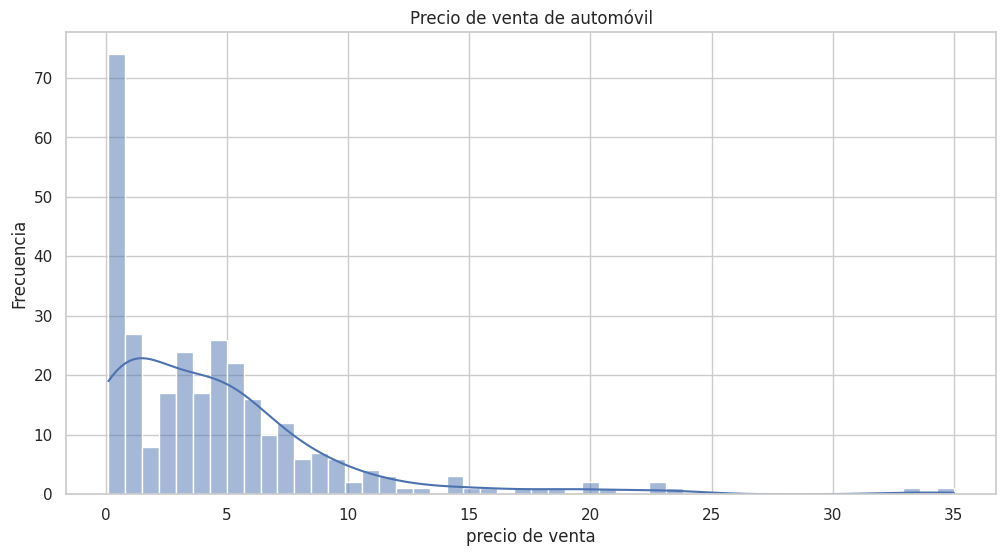

In [39]:
# Grafica un histograma para ver la distribución de la variable objetivo "Selling_Price"
### TU CÓDIGO AQUÍ ###
plt.figure(figsize=(12, 6))
sns.histplot(carritos_sesis['Selling_Price'], kde=True, bins=50)
plt.title('Precio de venta de automóvil')
plt.xlabel('precio de venta')
plt.ylabel('Frecuencia')
plt.show()

Interpretación:
a simple vista se observa que hay una asimetría positiva en el precio de venta de los carros, significando que muy pocos carros fueron comprados a niveles altos de precio, algo más que induce a la existencia de estos valores atípicos es que la media está a la derecha de la mediana.
De otro lado, la concentración de las compras de carros se ve en carros de muy bajo precio, si dividimos en 7 intervalos de misma amplitud la sección de precios de los 0 a los 5mil dolares vemos que hay más de 70 ventas entre los 0 y los 714.28 dolares aproximadamente, es decir se ve una distribución extraña.


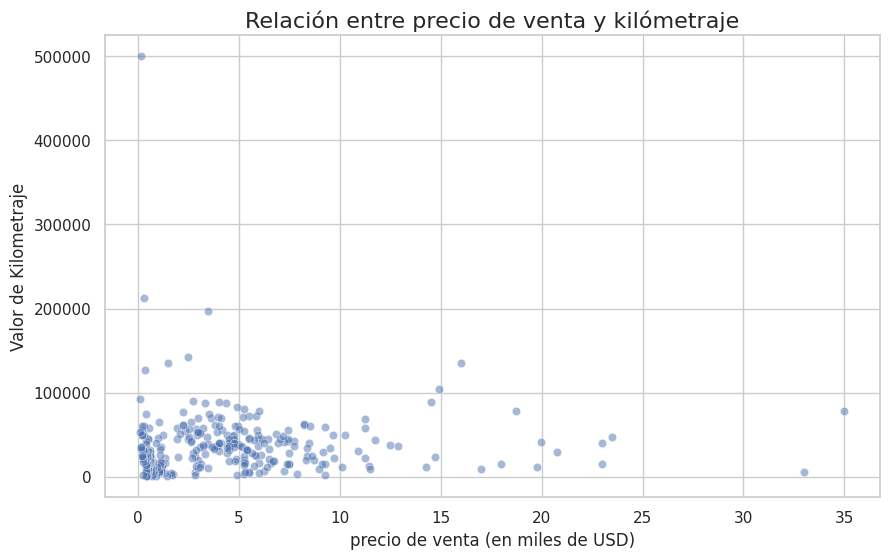

In [40]:
# Visualiza la relación entre 'Kms_Driven' y 'Selling_Price'
### TU CÓDIGO AQUÍ ###
# Gráfico de dispersión para Ingreso vs. Valor de la Vivienda
sns.scatterplot(x='Selling_Price', y='Kms_Driven', data=carritos_sesis, alpha=0.5)
plt.title('Relación entre precio de venta y kilómetraje', fontsize=16)
plt.xlabel('precio de venta (en miles de USD)')
plt.ylabel('Valor de Kilometraje')
plt.show()

Basado en el gráfico, ¿qué tipo de relación observas? ¿Es lo que esperabas económicamente?
no veo una relación los puntos parecen una nube si tendencia, esperaba que la relación fuera inversa dado que el caro estaría más desgastado y por tanto más depreciado su valor.

In [41]:
# Crea la variable "Car_Age" que será la resta entre el año actual y el año del carro
### TU CÓDIGO AQUÍ ###
Car_Age= 2025-carritos_sesis['Year']
carritos_sesis['Car_Age']=Car_Age

In [42]:
# Elimina la columna 'Car_Name' que no usaremos
### TU CÓDIGO AQUÍ ###
carritos_sesis = carritos_sesis.drop('Car_Name', axis=1)

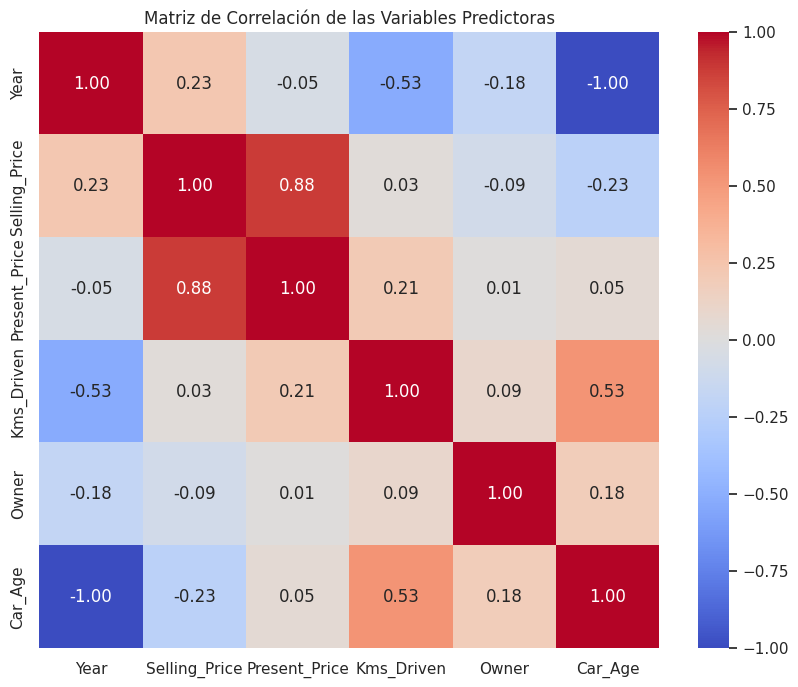

In [43]:
# Calcula la matriz de correlación para las variables numéricas y grafica el heatmap
### TU CÓDIGO AQUÍ ###
numeric_cols = carritos_sesis.select_dtypes(include=np.number)
corr_matrix = numeric_cols.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlación de las Variables Predictoras')
plt.show()

Escribe tus conclusiones aquí.

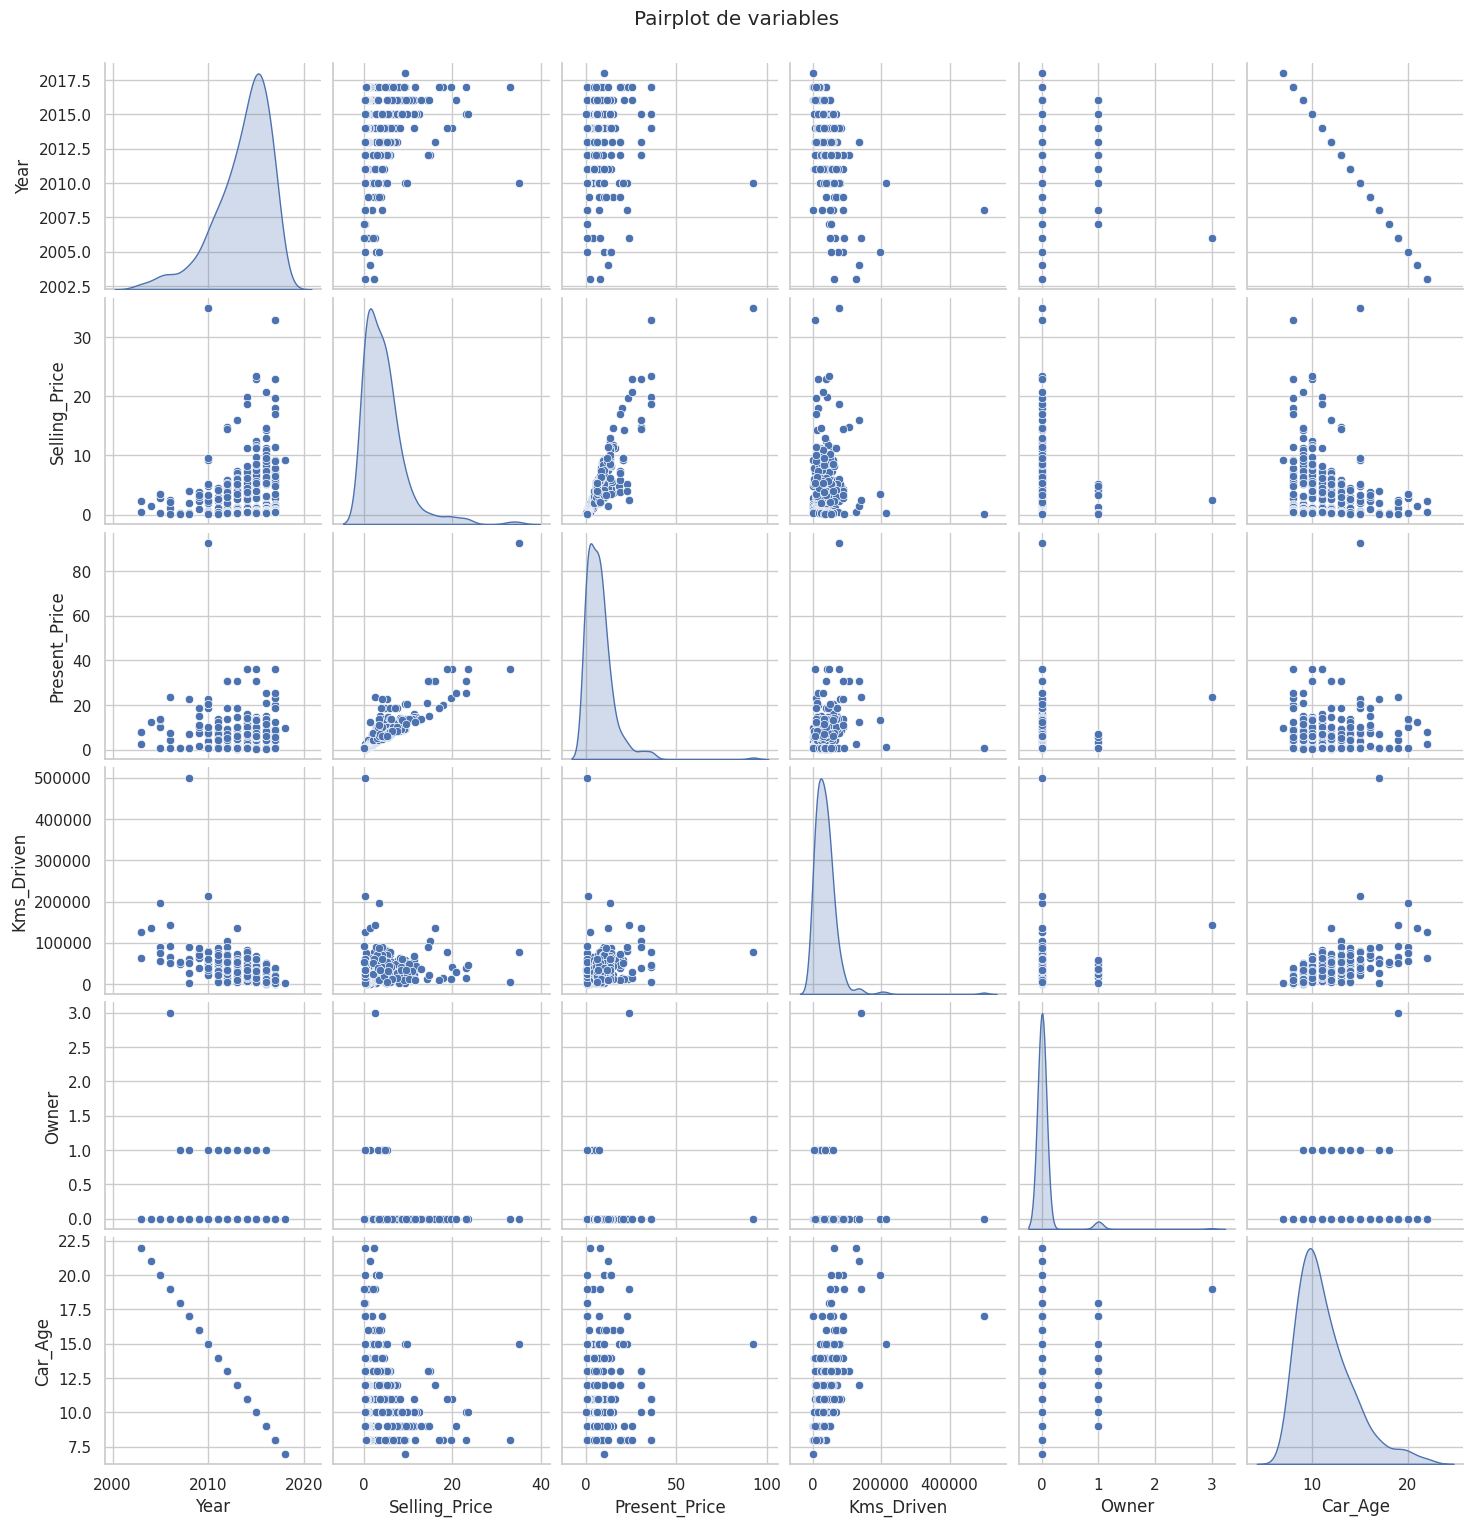

In [44]:
# Realiza un gráfico de pairplot para ver el comportamiento de las variables independientes y la dependiente "Selling_Price"
### TU CÓDIGO AQUÍ ###
sns.pairplot(carritos_sesis, diag_kind='kde')
plt.suptitle('Pairplot de variables', y=1.02)
plt.show()

Escribe tus conclusiones aquí.

In [45]:
# Convierte variables categóricas a numéricas para que el modelo las entienda.
# La regresión lineal no puede trabajar con texto ('Petrol', 'Dealer').
# Usaremos One-Hot Encoding con pd.get_dummies() para convertirlas.
# drop_first=True es importante para evitar multicolinealidad perfecta en las variables dummy
### TU CÓDIGO AQUÍ ###
carritos_sesis_encoded = pd.get_dummies(carritos_sesis, drop_first=True)
display(carritos_sesis_encoded.head())

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,11,False,True,False,True
1,2013,4.75,9.54,43000,0,12,True,False,False,True
2,2017,7.25,9.85,6900,0,8,False,True,False,True
3,2011,2.85,4.15,5200,0,14,False,True,False,True
4,2014,4.60,6.87,42450,0,11,True,False,False,True


# 4. Construcción y Evaluación del Modelo

In [46]:
# Define tus variables X e y
### TU CÓDIGO AQUÍ ###
y= carritos_sesis['Selling_Price']
X= carritos_sesis_encoded.drop('Selling_Price', axis=1)

In [47]:
# Divide los datos en entrenamiento y prueba (80% / 20%)
### TU CÓDIGO AQUÍ ###
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# Entrena el modelo de Regresión Lineal
### TU CÓDIGO AQUÍ ###

modelo_ml = LinearRegression()

#Entrenamos el modelo SOLAMENTE con los datos de entrenamiento
modelo_ml.fit(X_train, y_train)



LinearRegression()

In [49]:
# Realiza predicciones sobre el conjunto de prueba
### TU CÓDIGO AQUÍ ###
predicciones = modelo_ml.predict(X_test)

In [50]:
# Calcula las métricas de evaluación (RMSE y R2) para entrenamiento y prueba y compáralas
### TU CÓDIGO AQUÍ ###
# Predicciones en el conjunto de entrenamiento
predicciones_train = modelo_ml.predict(X_train)

# RMSE y R2 para entrenamiento
rmse_train = np.sqrt(mean_squared_error(y_train, predicciones_train))
r2_train = r2_score(y_train, predicciones_train)

# RMSE y R2 para prueba
rmse_test = np.sqrt(mean_squared_error(y_test, predicciones))
r2_test = r2_score(y_test, predicciones)

print(f"RMSE (Entrenamiento): {rmse_train:.2f}")
print(f"R2 (Entrenamiento): {r2_train:.2f}")
print(f"RMSE (Prueba): {rmse_test:.2f}")
print(f"R2 (Prueba): {r2_test:.2f}")

RMSE (Entrenamiento): 1.53
R2 (Entrenamiento): 0.90
RMSE (Prueba): 2.52
R2 (Prueba): 0.75


# 5. Conclusión para el Cliente

*Escribe un párrafo para los gerentes de 'AutoAnalitica'.*

1. Empieza explicando qué es el RMSE en términos sencillos (ej. "nuestro modelo se equivoca en promedio en..."). Recuerda que el precio en el dataset está en miles de dólares.


En promedio, nuestro modelo se equivoca en USD 2.520 al predecir el precio de venta de un carro.


2. Termina dando tu recomendación: ¿Es este modelo lo suficientemente bueno como un primer paso? ¿Para qué podría ser útil?

Dado que el modelo es capaz de explicar el 75% de la variabilidad en los precios de los automóviles del conjunto de prueba, se puede decir que es bueno como un primer paso en la predicción de precios en el mercado de autos. Su uso es aplicable para que los clientes o  vendedores interesados en adquirir carro puedan tener una idea de precio justa y así conllevar a la toma de desiciones.